In [14]:
import matplotlib.pyplot as plt
from scipy import io
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

# Import datasets, classifiers and performance fgg  metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix


In [15]:
classifiers = DecisionTreeClassifier(max_depth=10),

In [16]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.25),
    #SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(max_depth=10)]

In [17]:
a= pd.read_csv('yield_data_9_19_60m.csv')
X = a.iloc[:, 0:9]
labels = a['label'].values
labels

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [18]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(X, labels,random_state=42) #
X_train.shape

(60, 9)

In [19]:
for cls in classifiers:
    cls.fit(X_train, y_train)

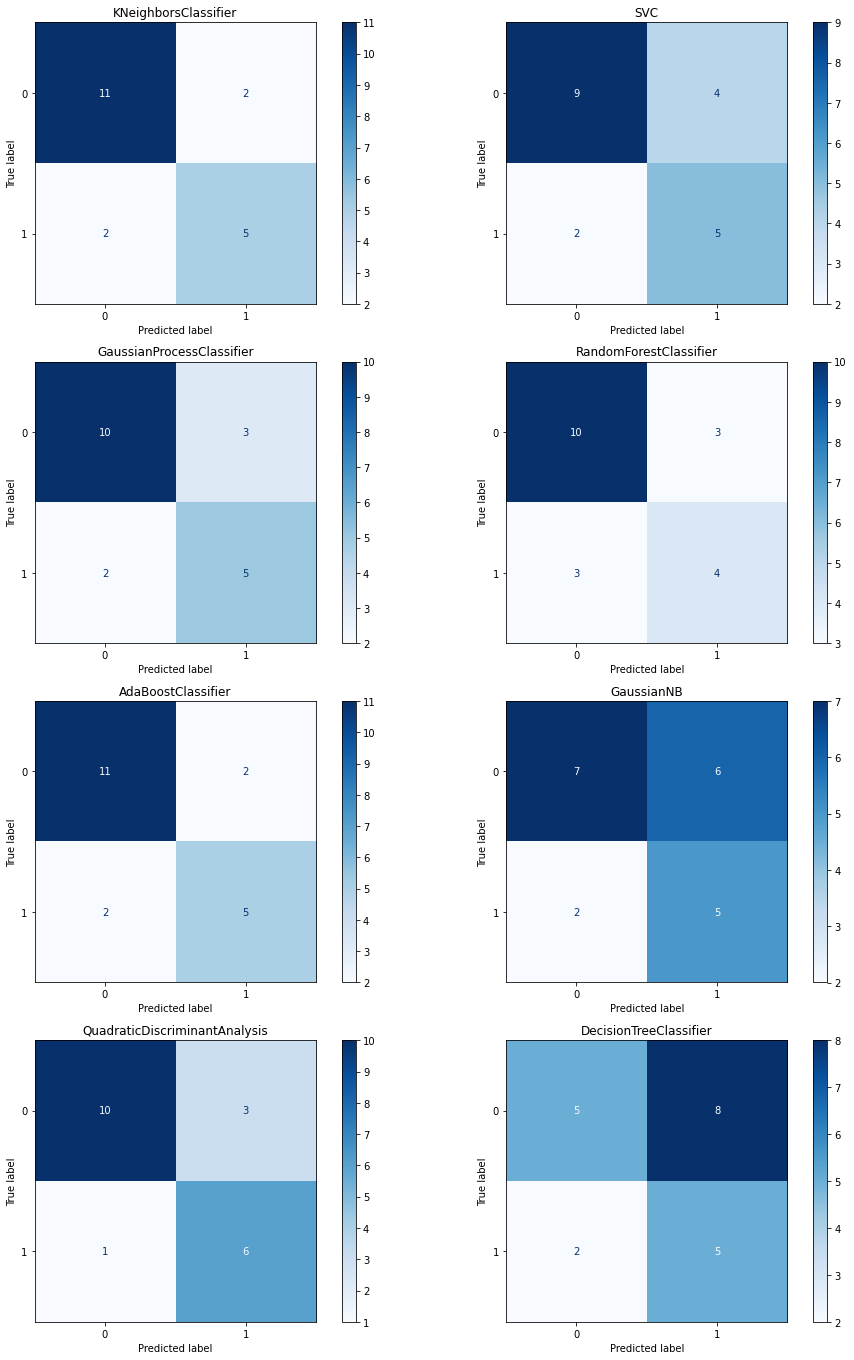

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,19))

for cls, ax in zip(classifiers, axes.flatten()):
    predicted = cls.predict(X_test)
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues'
                         ) #display_labels=data.target_names
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()
fig.savefig('classifier_dt.pdf', dpi = 300)

In [21]:
for cls, ax in zip(classifiers, axes.flatten()):
    predicted = cls.predict(X_test)
    print("Classification report for classifier %s:\n%s\n"
      % (cls, metrics.classification_report(y_test, predicted)))

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.71      0.71      0.71         7

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20


Classification report for classifier SVC(C=0.25, kernel='linear'):
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.56      0.71      0.63         7

    accuracy                           0.70        20
   macro avg       0.69      0.70      0.69        20
weighted avg       0.73      0.70      0.71        20


Classification report for classifier GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      

In [22]:
from sklearn import tree

In [23]:
X_train

,NDVImean,GNDVI,canopy_size,rededge_ndvi,rtvi_core,mtvi,ci_rededge,ci_green,irrigation
9,0.598201,0.417730,6.111,0.301840,3.595354,0.364103,0.891671,1.589239,1
64,0.719086,0.538592,7.332,0.412462,4.805621,0.491100,1.467762,2.573427,4
5,0.665780,0.472749,6.643,0.355802,4.202745,0.414378,1.139071,1.966474,1
47,0.717948,0.527077,6.109,0.398472,4.929663,0.473517,1.381675,2.439047,3
34,0.716215,0.535674,5.636,0.391355,5.912140,0.487748,1.333859,2.481648,2
62,0.717517,0.525944,5.881,0.387159,4.723473,0.472280,1.307379,2.380694,4
42,0.729193,0.570242,5.987,0.436469,5.190695,0.533879,1.634049,2.909776,3
54,0.754775,0.554953,5.781,0.386984,5.510527,0.497609,1.304817,2.605557,3
16,0.681229,0.493606,5.372,0.351689,5.556223,0.443380,1.124086,2.092967,1
39,0.712762,0.501139,5.001,0.351983,5.051512,0.435847,1.130262,2.141331,2


In [24]:
f_name = ["NDVI", "GNDVI", "Canopy_size", "NDVIre", "RTVIcore", "MTVI2", "CIre", "CIg", "Irrigation level"]

[Text(309.04615384615386, 821.4399999999999, 'NDVIre <= 0.334\ngini = 0.5\nsamples = 60\nvalue = [30, 30]\nclass = low yied'),
 Text(240.36923076923077, 724.8, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = low yied'),
 Text(377.7230769230769, 724.8, 'RTVIcore <= 5.028\ngini = 0.488\nsamples = 52\nvalue = [22, 30]\nclass = high yield'),
 Text(137.35384615384615, 628.16, 'Canopy_size <= 5.995\ngini = 0.278\nsamples = 18\nvalue = [3, 15]\nclass = high yield'),
 Text(68.67692307692307, 531.52, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = high yield'),
 Text(206.03076923076924, 531.52, 'NDVI <= 0.719\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = high yield'),
 Text(137.35384615384615, 434.88, 'RTVIcore <= 4.442\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = low yied'),
 Text(68.67692307692307, 338.24, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = high yield'),
 Text(206.03076923076924, 338.24, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = low yied'),
 Text(274.707

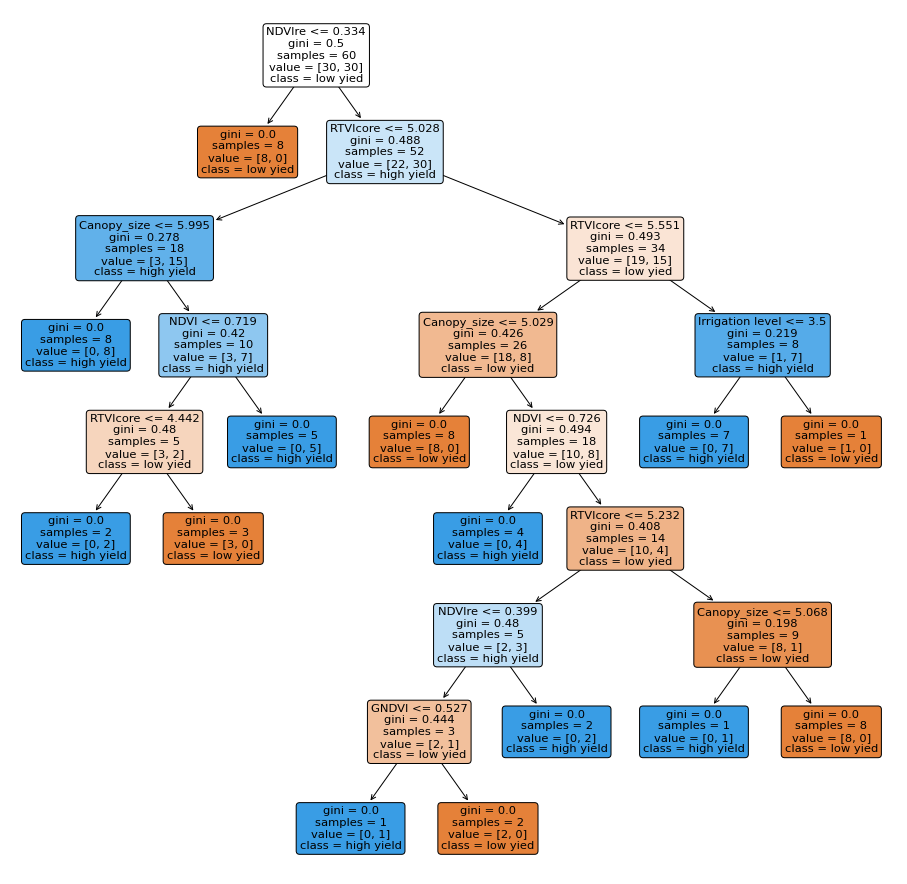

In [25]:
plt.figure(figsize=(16,16))
tree.plot_tree(cls, feature_names=f_name, class_names= ["low yied", "high yield"], filled=True, rounded=True)